In [1]:
import time
start = time.time()

# Support Vector Machines - Exemplo 004

Neste exemplo utilizaremos SVM com "balanceamento de classes Undersampling" e "validação cruzada" para facilitar o Processo de Desenvolvimento de Machine Learning.

# Processo para o Desenvolvimento de Machine Learning

Vamos iniciar pelo que podemos chamar de clico de vida de ML, ou seja, utilizaremos essa "Big Picture" como guia.

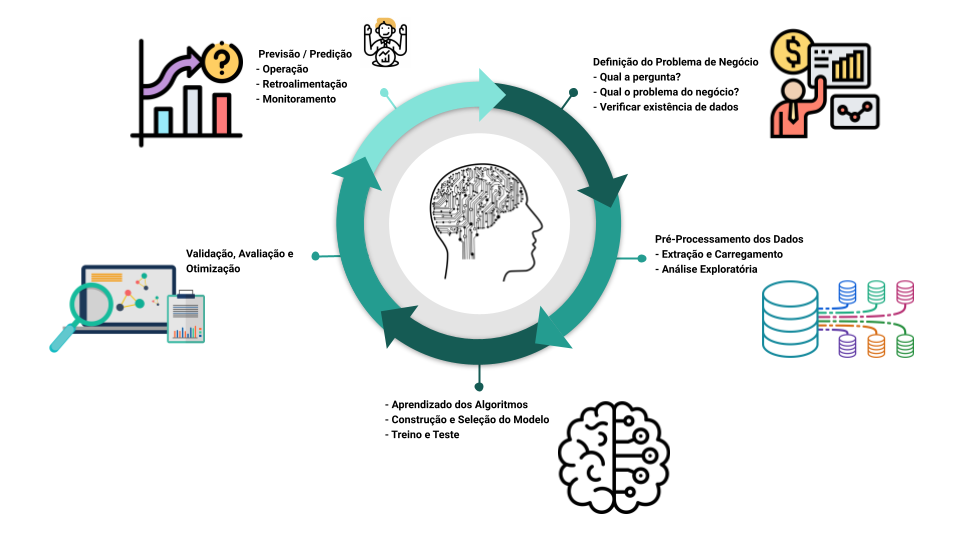

In [2]:
from IPython.display import Image
Image('Processo.png')

In [3]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.3


In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
import sklearn as sl
warnings.filterwarnings("ignore")
sl.__version__

'1.2.2'

## Definição do Problema de Negócio

## Pré-Processamento dos Dados

### Extração e Carregamento

In [5]:
import pandas as pd
data=pd.read_csv('spam.csv')
data.rename(columns={'v1':'Label','v2':'EmailText'},inplace=True)

### Análise Exploratória

In [6]:
# Visualizando as primeiras 10 linhas
print(data.head(10))

  Label                                          EmailText
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


#### Estatística Descritiva

In [7]:
# Visualizando as dimensões
data.shape

(5572, 2)

In [8]:
# Tipo de dados de cada atributo
data.dtypes

Label        object
EmailText    object
dtype: object

In [9]:
# Sumário estatístico
data.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Verificando se a variável resposta está balanceada

In [10]:
target_count = data.Label.value_counts()
target_count

Label
ham     4825
spam     747
Name: count, dtype: int64

#### Realizando o balanceamento de Classes

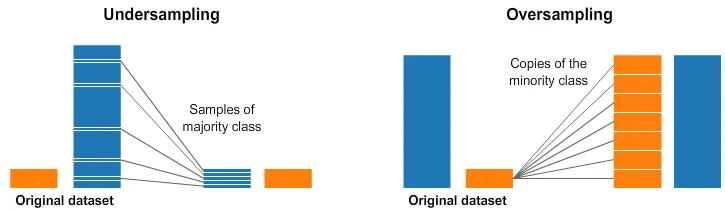

In [11]:
from IPython.display import Image
Image('under_over_sampling.png')

Apesar da vantagem de balancear classes, essas técnicas também possuem suas fraquezas.

A implementação mais simples de over-sampling é duplicar registros aleatórios da classe minoritária, o que pode causar overfitting.

Com under-sampling, a técnica mais simples envolve a remoção de registros aleatórios da classe majoritária, o que pode causar perda de informações.

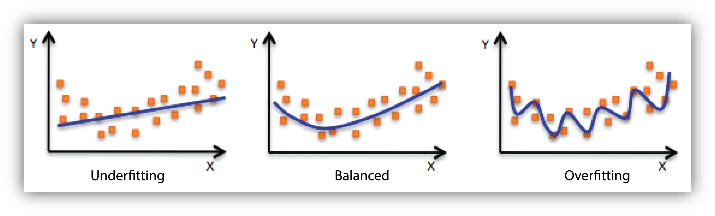

In [12]:
from IPython.display import Image
Image('over_unde_fitting.png')

#### Random under sampling

In [13]:
target_count = data.Label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 4825
Class 1: 747
Proportion: 6.46 : 1


In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Label']= label_encoder.fit_transform(data['Label'])

In [15]:
count_class_0, count_class_1 = data.Label.value_counts()
target_class_0 = data[data['Label'] == 0]
target_class_1 = data[data['Label'] == 1]

Random under-sampling:
Label
0    747
1    747
Name: count, dtype: int64


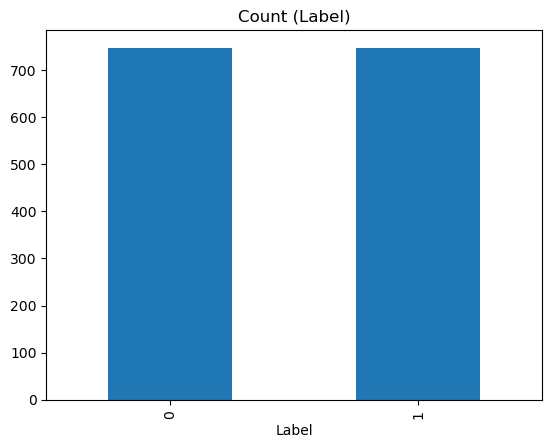

In [16]:
data_class_0_under = target_class_0.sample(count_class_1)
data_test_under = pd.concat([data_class_0_under, target_class_1], axis=0)
print('Random under-sampling:')
print(data_test_under.Label.value_counts())
data_test_under.Label.value_counts().plot(kind='bar', title='Count (Label)');

## Aprendizado dos Algoritmos

### Classificação utilizando Support Vector Machines - Sem Balanceamento de Classes

#### Separar os dados em Treino e Teste

(test_size = .02) ou seja, 20% para teste

(random_state=0) para assegurar os mesmos valores em todas as vezes.

In [17]:
X = data_test_under['EmailText'].values
y = data_test_under['Label'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#### Convertendo texto em integer

In [19]:
cv = CountVectorizer() 
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

#### Definição do algoritmo

In [20]:
modeloSVM = SVC(kernel = 'rbf', random_state = 0, probability=True)

#### Treinamento do modelo usando dataset de treino

In [21]:
modeloSVM.fit(X_train, y_train)

SVC(probability=True, random_state=0)

## Validação, Avaliação e Otimização

### Cross Validation

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. 

Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). 

Cada parte é chamada fold. 

O algoritmo é treinado em k-1 folds. 

Cada fold é usado no treinamento de forma repetida e um fold por vez. 

Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão.

O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. 

A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

In [22]:
%%time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = seed)

# Cross Validation
resultado = cross_val_score(modeloSVM, X_train, y_train, cv = kfold)

# Print do resultado
print("Acurácia Média: %.3f" % (resultado.mean() * 100))
print("Acurácia Desvio: %.3f" % (resultado.std() * 100))

Acurácia Média: 94.058
Acurácia Desvio: 2.460
CPU times: user 8.86 s, sys: 110 ms, total: 8.97 s
Wall time: 9.14 s


### Gerando as predições usando a base de teste (validação)

In [23]:
modeloSVM_preds = modeloSVM.predict(X_test)

### Gerando Matriz de Confusão

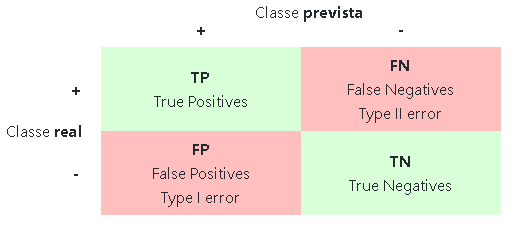

In [24]:
from IPython.display import Image
Image('matrix3.png')

In [25]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=modeloSVM_preds)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[143   8]
 [ 11 137]]


### Principais Métricas

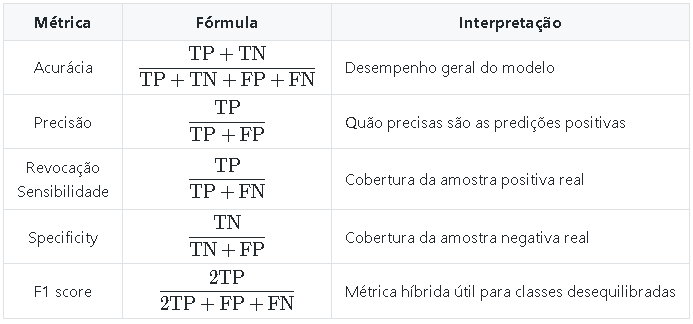

In [26]:
from IPython.display import Image
Image('metricas.png')

In [27]:
TP = int(conf_mat[0,0])
FN = int(conf_mat[0,1])
FP = int(conf_mat[1,0])
TN = int(conf_mat[1,1])

In [28]:
Acurária = (TP + TN) / (TP + TN + FP + FN)
Acurária

0.9364548494983278

In [29]:
Precisão = TP / (TP + FP)
Precisão

0.9285714285714286

In [30]:
Recall = TP / (TP + FN)
Precisão

0.9285714285714286

In [31]:
Specificity = TN / (TN + FP)

In [32]:
F1_Score = (2 * TP) / (2 * TP + FP + FN)
F1_Score

0.9377049180327869

### Serializar os resultados do Modelo

In [33]:
end = time.time()
tempo = (end - start)

In [34]:
import csv
# field names 
fields = ['Modelo', 'Acurácia', 'Precisão', 'Recall', 'Specificity', 'F1 Score'] 
    
# data rows of csv file 
rows = [['SVM Undersampling e validação cruzada', Acurária, Precisão, Recall, Specificity, F1_Score, tempo ] ]
  
with open('resultados.csv', 'a') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
#    write.writerow(fields)
    write.writerows(rows)

    # Close the file object
    f.close()